## 1. Research Question

Can we predict whether it will rain on a given day in San Diego using varaibles such as humidity, wind speed, sea-level pressure, and minimum temperature?

## 2. Data cleaning

Here we will clean the san diego weather dataset, creating a new column called "Rain" which be set to 1 if there was rain, 0 otherwise. Then using that we fill randomly sample an equal number of no-rain days vs rain days in order to combine the two subsets and shuffle them. This should greatly help with the imbalance, as prior EDA found it only rained about ~10% of the time. 

1. Start with full cleaned dataframe
2. create rain col
3. Sum up rainy days
4. Randomly sample equal number of non rainy days
5. Combine into final set

### Step 1: Full cleaned dataframe

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
path = "data/full_set.csv"

In [73]:
full_set = pd.read_csv(path)

#Keeping only needed cols
cols_to_keep = [
    "DATE",
    "DailyPrecipitation",
    "DailyAverageRelativeHumidity",
    "DailyAverageWindSpeed",
    "DailyAverageSeaLevelPressure",
    "DailyMinimumDryBulbTemperature"
]

full_set = full_set[cols_to_keep].copy()

C:\Users\Beandip\AppData\Local\Temp\ipykernel_31500\3487967754.py:1: DtypeWarning: Columns (3,21,27,28,29,30,31,32,33,34,38,43,44,45,49,50,52,53,54,70,72,73,89,96,97,98,99,100,101,102,103,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  full_set = pd.read_csv(path)


In [74]:
#cleaning up precipitation col
full_set["DailyPrecipitation"] = (
    full_set["DailyPrecipitation"]
        .replace("T", 0.005)   # trace amounts = tiny rainfall
        .replace("M", np.nan)  # missing data
)

In [75]:
#cleaning up tempature (converting to int)
full_set["DailyMinimumDryBulbTemperature"] = pd.to_numeric(full_set["DailyMinimumDryBulbTemperature"], errors="coerce")

In [76]:
full_set = full_set.dropna()

In [77]:
#Renaming for easier access
full_set = full_set.rename(columns={
    "DailyPrecipitation": "precip",
    "DailyAverageRelativeHumidity": "humidity",
    "DailyAverageWindSpeed": "wind_speed",
    "DailyAverageSeaLevelPressure": "sea_pressure",
    "DailyMinimumDryBulbTemperature": "min_temp"
})

In [78]:
print(full_set)

                       DATE precip  humidity  wind_speed  sea_pressure  \
28      2016-01-01T23:59:00   0.00      39.0         1.2         30.10   
57      2016-01-02T23:59:00   0.00      48.0         1.9         30.08   
86      2016-01-03T23:59:00  0.005      62.0         4.3         29.95   
130     2016-01-04T23:59:00   0.14      77.0         4.6         29.81   
198     2016-01-05T23:59:00   1.65      80.0        10.8         29.90   
...                     ...    ...       ...         ...           ...   
111007  2024-09-26T23:59:00   0.00      77.0         6.8         29.89   
111049  2024-09-27T23:59:00   0.00      79.0         6.1         29.87   
111094  2024-09-28T23:59:00   0.00      79.0         6.2         29.88   
111140  2024-09-29T23:59:00   0.00      81.0         7.0         29.89   
111183  2024-09-30T23:59:00   0.00      79.0         4.6         29.89   

        min_temp  
28          44.0  
57          45.0  
86          48.0  
130         56.0  
198         58.0

## Step 2: Rain column

In [79]:
full_set["precip"] = pd.to_numeric(full_set["precip"], errors='coerce')

In [80]:
full_set["rain"] = (full_set["precip"] > 0).astype(int)

In [81]:
print(full_set)

                       DATE  precip  humidity  wind_speed  sea_pressure  \
28      2016-01-01T23:59:00   0.000      39.0         1.2         30.10   
57      2016-01-02T23:59:00   0.000      48.0         1.9         30.08   
86      2016-01-03T23:59:00   0.005      62.0         4.3         29.95   
130     2016-01-04T23:59:00   0.140      77.0         4.6         29.81   
198     2016-01-05T23:59:00   1.650      80.0        10.8         29.90   
...                     ...     ...       ...         ...           ...   
111007  2024-09-26T23:59:00   0.000      77.0         6.8         29.89   
111049  2024-09-27T23:59:00   0.000      79.0         6.1         29.87   
111094  2024-09-28T23:59:00   0.000      79.0         6.2         29.88   
111140  2024-09-29T23:59:00   0.000      81.0         7.0         29.89   
111183  2024-09-30T23:59:00   0.000      79.0         4.6         29.89   

        min_temp  rain  
28          44.0     0  
57          45.0     0  
86          48.0     1  

### Step 3 + 4: Sum of rainy days and creating subsets

In [82]:
full_set["rain"].value_counts()

rain
0    2549
1     611
Name: count, dtype: int64

In [83]:
rain_days = full_set[full_set["rain"] == 1]
no_rain_days = full_set[full_set["rain"] == 0]

In [84]:
n = len(rain_days)
no_rain_sample = no_rain_days.sample(n=n, random_state=42)


### Step 5: Combining and shuffling

In [85]:
final_data = pd.concat([rain_days, no_rain_sample])

In [86]:
#Sanity check
print(final_data)

                      DATE  precip  humidity  wind_speed  sea_pressure  \
86     2016-01-03T23:59:00   0.005      62.0         4.3         29.95   
130    2016-01-04T23:59:00   0.140      77.0         4.6         29.81   
198    2016-01-05T23:59:00   1.650      80.0        10.8         29.90   
244    2016-01-06T23:59:00   0.610      73.0         8.1         30.01   
277    2016-01-07T23:59:00   0.560      67.0        11.7         29.94   
...                    ...     ...       ...         ...           ...   
41063  2019-04-13T23:59:00   0.000      56.0         4.8         29.98   
33052  2018-08-20T23:59:00   0.000      72.0         7.1         29.94   
82296  2022-08-02T23:59:00   0.000      75.0         7.4         30.00   
43899  2019-07-05T23:59:00   0.000      70.0         5.5         30.01   
26730  2018-02-11T23:59:00   0.000      71.0         4.6         29.91   

       min_temp  rain  
86         48.0     1  
130        56.0     1  
198        58.0     1  
244        54.0

In [87]:
balanced_set = final_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [88]:
balanced_set.head()

,DATE,precip,humidity,wind_speed,sea_pressure,min_temp,rain
0,2019-04-05T23:59:00,0.060,75.0,5.9,30.04,56.0,1
1,2022-01-15T23:59:00,0.030,62.0,3.0,30.13,52.0,1
2,2016-06-01T23:59:00,0.005,76.0,4.5,29.93,61.0,1
3,2023-03-26T23:59:00,0.000,60.0,5.1,30.12,48.0,0
4,2023-10-23T23:59:00,0.005,75.0,6.5,29.80,62.0,1


In [89]:
#Saving the new CSV
balanced_set.to_csv('data/balanced_set.csv', index=False)

## 3 EDA 

With our balanced dataset we can now move on to exploring the predictors. We will use: Histograms (for distrubution shape), Boxplots (spread), Correlation matrix (overview of relationships), scatterplots between pairs of predictors (multcollinearity)

In [91]:
#Quick look
balanced_set.describe()

,precip,humidity,wind_speed,sea_pressure,min_temp,rain
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,0.072480,69.789689,6.052455,29.995360,57.964812,0.500000
std,0.227891,10.971520,2.473229,0.102928,7.290817,0.500205
min,0.000000,23.000000,1.800000,29.570000,38.000000,0.000000
25%,0.000000,65.000000,4.500000,29.930000,53.000000,0.000000
50%,0.002500,72.000000,5.800000,29.990000,58.000000,0.500000
75%,0.017500,77.000000,7.000000,30.060000,63.000000,1.000000
max,2.730000,95.000000,21.600000,30.290000,78.000000,1.000000


Summary of variables falls in line with San Diego weather. We see humidity averages to around 70%, wind speed at 6% and temperatures around 57F

### Histograms

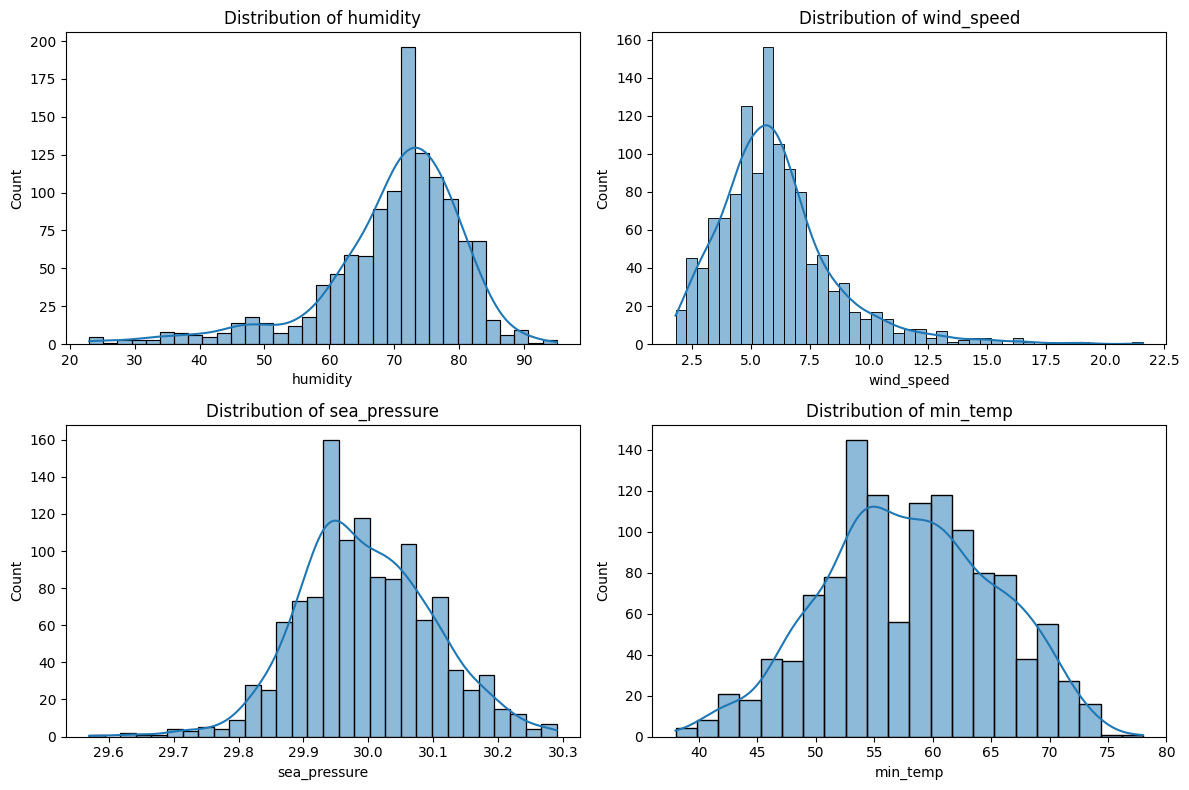

In [92]:
cols = ["humidity", "wind_speed", "sea_pressure", "min_temp"]

plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(balanced_set[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Humidity: Roughly bell shape, centered around 70-75%
Wind_speed: Right skewed since most days arent too windy
sea_pressure: Clustered around 29.9-30 inches of mercury
min_temp: Distribution centered around 55-60F

### Boxplots
Grouped by rain vs no rain

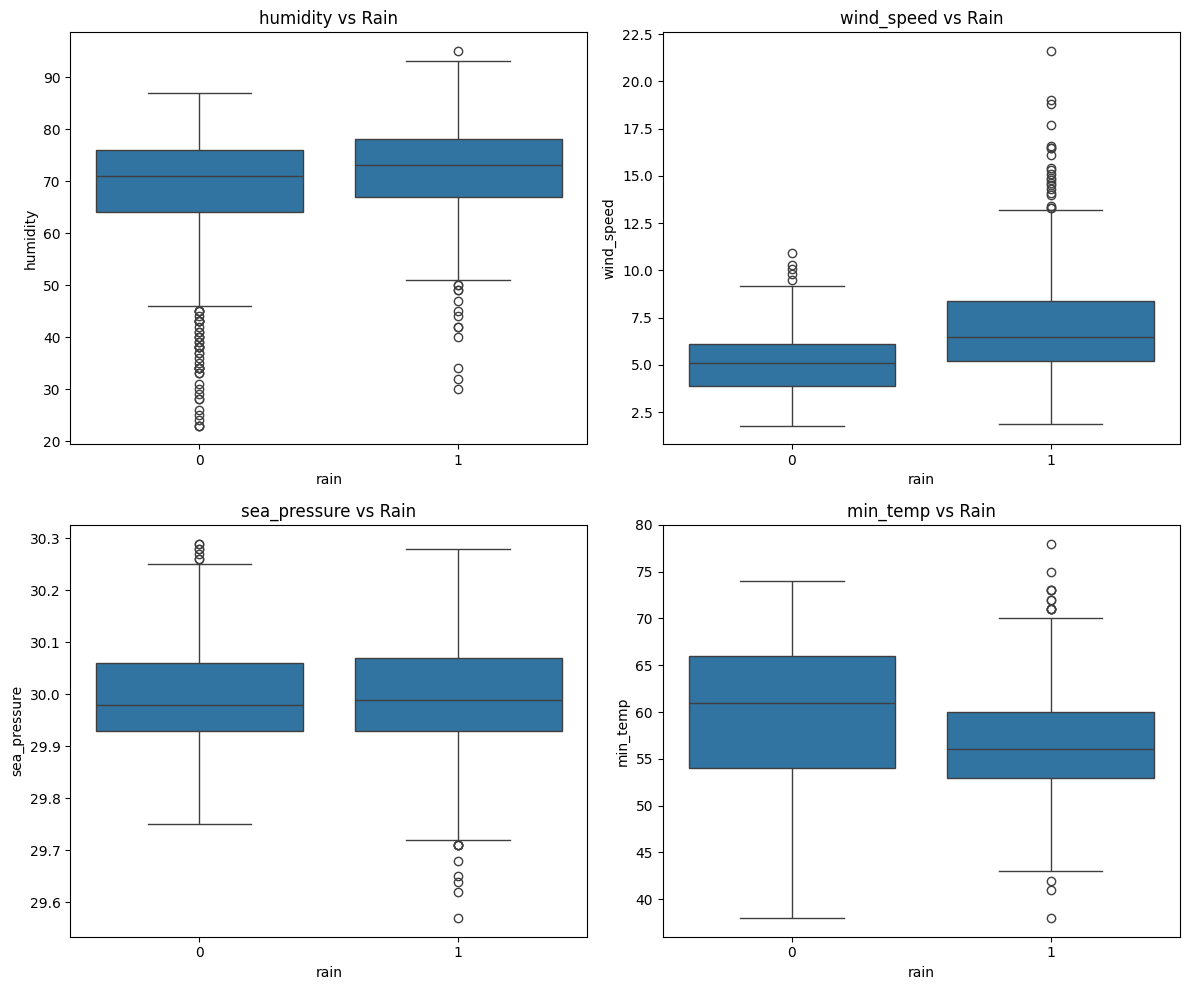

In [60]:
plt.figure(figsize=(12,10))
for i, col in enumerate(cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data=balanced_set, x="rain", y=col)
    plt.title(f"{col} vs Rain")
plt.tight_layout()
plt.show()

Humidity: Higher median humidity on rainy days. The updwards shift indicates moist air is probably associated with rainfall

Wind_speed: Rainy days have higher median wind speeds compared to dry days. Should prove useful for separation between classes

sea_pressure: Very slight increase in median sea pressure but huge overlap indicates weak predictive power 

min_temp: Rainy days often are colder supported by the noticeable difference in median

### Correlation Matrix

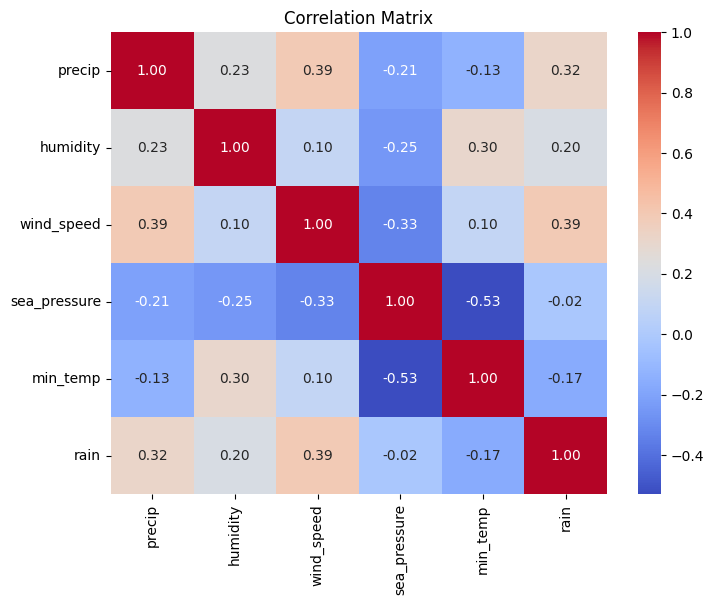

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(balanced_set.drop(columns=["DATE"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Predictors show low to moderate correlations, easing large concerns of multicollinearity. For the stronger correlations we see:

Sea pressure and min temp have the highest at -0.53. This makes sense as lower pressure coincides with cooler conditions

Wind speed and sea pressure also seem to have some correlation at -0.33, following storm pattern trends of high winds with low pressure

Humidity and min temp are slightly correated at 0.30, meaning humid nights are usually warmer

In relation to rain we see:

Humidity: some positive correlation at 0.20

Wind_speed: strongest positive correlation at 0.39

sea_pressure: almost no correlation at -0.02

min_temp: some negative correlation at -0.17


Overall rain shows the strongest associations with wind speed and precipitation, weaker relationships with humidity and temperature, and almost no relationship with sea-level pressure.

## 4. Model implementations 

### Simple Logistic Regression

### Adding an interaction term

### Regularization